In [62]:
"""Explore the behaviour of optimal solution of linear autoencoder."""
import torch
import torch.nn as nn
import torch.optim as optim
from torch import mm, transpose
import matplotlib.pyplot as plt

In [63]:
class LAE(nn.Module):
    def __init__(self, M, N):
        super(LAE, self).__init__()
        self.m = M
        self.n = N
        self.w1 = nn.Linear(M, N, bias=False)
        self.w2 = nn.Linear(N, M, bias=False)

    def forward(self, y):
        y = self.w1(y)
        y = self.w2(y)
        return y

def L2Loss(outputs, targets):
    return torch.linalg.norm(outputs-targets)


In [64]:
M = 7
N = 5

net = LAE(M, N)

learning_rate = 0.003
epochs = 10000
counter = 1000
params = list(net.parameters())
optimizer = optim.Adam(params, lr=learning_rate)

In [65]:
inputs = torch.rand(M)*2
targets = inputs

In [66]:
loss_plt = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = L2Loss(outputs, targets)
    loss.backward()
    optimizer.step()
    #outputs = outputs.detach()
    loss_plt.append(loss.item())
    if ((epoch+1)%counter) == True:
        print('epoch: ', epoch, 'loss: ', loss.item())

epoch:  0 loss:  3.4131720066070557
epoch:  1000 loss:  0.007013953290879726
epoch:  2000 loss:  0.003904192242771387
epoch:  3000 loss:  0.006096253637224436
epoch:  4000 loss:  0.005763025488704443
epoch:  5000 loss:  0.005831998307257891
epoch:  6000 loss:  0.005916993133723736
epoch:  7000 loss:  0.0074995774775743484
epoch:  8000 loss:  0.0063502429984509945
epoch:  9000 loss:  0.00381756154820323


0.005808331537991762

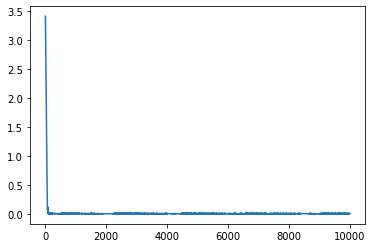

In [67]:
plt.plot(loss_plt)
loss_plt[-1]


In [68]:
L2Loss(net(inputs), targets)

tensor(0.0053, grad_fn=<LinalgVectorNormBackward0>)

In [70]:
W1 = params[0].requires_grad_(False)
W2 = params[1].requires_grad_(False)

In [71]:
input = inputs.resize(M, 1)
mm(mm(W2, W1), input) - input

tensor([[-0.0018],
        [-0.0024],
        [-0.0024],
        [-0.0004],
        [-0.0019],
        [-0.0022],
        [-0.0023]])

In [74]:
Y = input
grad_w1_true = 2*mm(mm(transpose(W2, 0, 1), mm(W2, W1)-torch.eye(M)), mm(Y, transpose(Y, 0, 1)))
grad_w2_true = 2*mm(mm(mm(W2, W1)-torch.eye(M), mm(Y, transpose(Y, 0, 1))), transpose(W1, 0, 1))

In [76]:
sum(sum(abs(grad_w1_true)))

tensor(0.2002)